### 5.2.2 训练算法：使用梯度上升找到最佳参数

#### 程序清单 5-1 Logistic 回归梯度上升优化算法


In [21]:
import numpy as np


path='D:\\机器学习实战代码\\machinelearninginaction\\Ch05\\testSet.txt'
def LoadDataSet(path):
    """加载数据"""
    dataMat=[]    # 自变量
    labelMat=[]   # 因变量
    fr=open(path)
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[-1]))
    return dataMat,labelMat


def sigmoid(x):
    return 1.0/(1+np.exp(-x))


def gradAscent(dataMatIn,classLabels,alpha=0.001,max_iter=1000):
    """梯度提升法求解最优权重"""
    dataMat=np.mat(dataMatIn)    # 转换为矩阵，注意，非数组
    labelMat=np.mat(classLabels).T
    print('dataMat.shape: ',dataMat.shape)
    print('labelMat.shape: ',labelMat.shape)
    m,n=np.shape(dataMatIn)    # 自变量维度
    
    max_iter=max_iter    # 最大迭代次数
    weights=np.ones((n,1))    # 初试化权重

    for iter in range(max_iter):
        h=sigmoid(dataMat*weights)    # 矩阵乘法
        error=(labelMat-h)
        weights+=alpha*dataMat.T*error    # 转置，得到一个列向量
    return weights

In [24]:
X,y=LoadDataSet(path)
weights1=gradAscent(X,y)
weights1

dataMat.shape:  (100, 3)
labelMat.shape:  (100, 1)


array([[ 5.43822336],
       [ 0.58605575],
       [-0.78334895]])

In [23]:
X[:10]

[[1, -0.017612, 14.053064],
 [1, -1.395634, 4.662541],
 [1, -0.752157, 6.53862],
 [1, -1.322371, 7.152853],
 [1, 0.423363, 11.054677],
 [1, 0.406704, 7.067335],
 [1, 0.667394, 12.741452],
 [1, -2.46015, 6.866805],
 [1, 0.569411, 9.548755],
 [1, -0.026632, 10.427743]]

### 5.2.3 分析数据：画出决策边界：

#### 程序清单 5-2 画出数据集和 Logistic 回归拟合直线


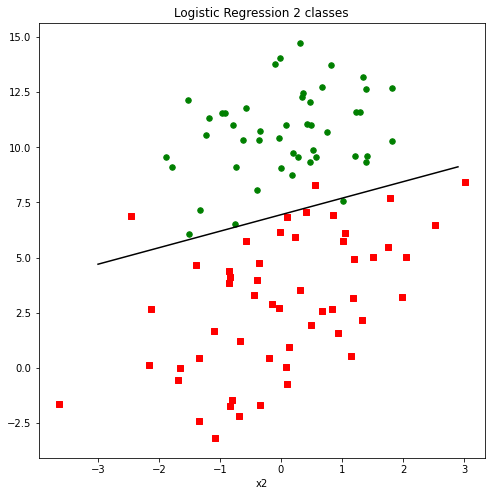

In [27]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights=wei  # mat->arr
    dataMat,labelMat=LoadDataSet(path)
    dataArr=np.array(dataMat)
    n=dataArr.shape[0]    # 样本个数
    xcord1=[]
    ycord1=[]    # 保存正样本
    xcord2=[]
    ycord2=[]    # 保存负样本
    
    for i in range(n): # 样本归类
        if labelMat[i]==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
            
    plt.figure(figsize=(8,8))
    plt.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    plt.scatter(xcord2,ycord2,s=30,c='green')
    
    # 绘制分界线
    x=np.arange(-3,3,0.1)
    y=-(weights[0]+weights[1]*x)/weights[2]    # 解方程得到的直线表达式
    plt.plot(x,y,'k')
    plt.xlabel('x1')
    plt.xlabel('x2')
    plt.title('Logistic Regression 2 classes')
    plt.show()
    
    
plotBestFit(weights1)

### 5.2.4 随机梯度上升

#### 代码清单 5-4 改进的随机梯度上升算法


In [28]:
def stocGradAscent1(dataMat, classLabels, numIter=150):
    dataMat = np.array(dataMat)
    m, n = dataMat.shape
    weights = np.ones(n)

    for j in range(numIter):
        for i in range(m):
            alpha = 4/(1+i+j)+0.01    # 变学习率，随着迭代次数的增加而减少
            randIndex = int(np.random.uniform(0, m))    # 随机选取样本的idx
            h = sigmoid(dataMat[randIndex].dot(weights))
            error = classLabels[randIndex]-h
            weights += alpha*error*dataMat[randIndex]    # 数值 乘
    return weights


weights2 = stocGradAscent1(X, y)


In [29]:
weights2

array([13.41774244,  1.2713328 , -2.00402617])

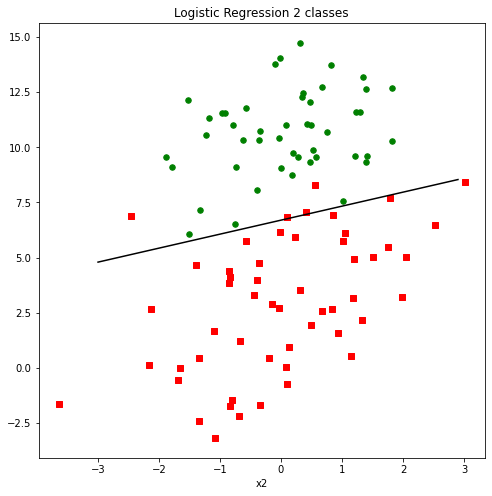

In [32]:
plotBestFit(weights2)

#### 尝试使用随机批量 梯度提升法


In [30]:
def BatchGradAscent(dataMat, classLabels, numIter=150):
    dataMat = np.array(dataMat)
    classLabels=np.array(classLabels)
    m, n = dataMat.shape
    weights = np.ones(n)
    batchsize=int(m/10)

    for j in range(numIter):
        alpha=4/(j)+0.002
        randIndexs=np.random.randint(0,m,batchsize)
        h=sigmoid(dataMat[randIndexs].dot(weights))
        error=classLabels[randIndexs]-h
        weights+=alpha*dataMat.T.dot(error)
    return weights


weights3 = stocGradAscent1(X, y)


In [31]:
weights3

array([13.91005796,  1.39331121, -1.86588569])

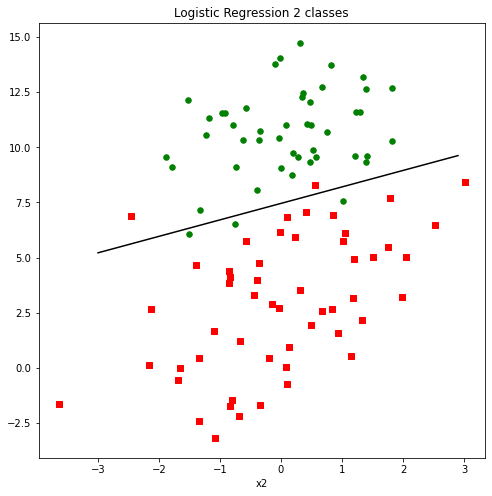

In [33]:
plotBestFit(weights3)